In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Import Dataset 

In [122]:
df= pd.read_csv('data_balita.csv')

In [123]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [125]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [126]:
#values of Jenis Kelamin column
df['Jenis Kelamin'].unique()

array(['laki-laki', 'perempuan'], dtype=object)

In [127]:
#values of Status Gizi column
df['Status Gizi'].unique()

array(['stunted', 'tinggi', 'normal', 'severely stunted'], dtype=object)

In [128]:
#find null in each column
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [129]:
# duplicate data
df.duplicated().sum()

81574

## Exploratory Data Analysis

In [130]:
#check columns in data
df.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

In [131]:
#rename columns in english
df = df.rename(columns = {'Umur (bulan)' : 'age(month)',
                     'Jenis Kelamin' : 'gender',
                     'Tinggi Badan (cm)' : 'height(cm)',
                    'Status Gizi' : 'status'})

In [132]:
#gender in english
df['gender'] = df['gender'].replace({'laki-laki' : 'male' ,
                  'perempuan' : 'female'})

In [133]:
#status in english
df['status'] = df['status'].replace({
    'tinggi' : 'tall',
})

### How many people according to gender are normal?

In [14]:
df_status_gender = df.groupby(['status','gender']).count().reset_index()

In [15]:
df_normal_gender = df_status_gender[df_status_gender['status'] == 'normal'].reset_index()
df_normal_gender = df_normal_gender.drop(columns='age(month)',axis=1)
df_normal_gender.rename(columns={'height(cm)':'total'},inplace=True)
df_normal_gender = df_normal_gender.drop(columns='index',axis=1)

In [16]:
df_normal_gender

,status,gender,total
0,normal,female,34352
1,normal,male,33403


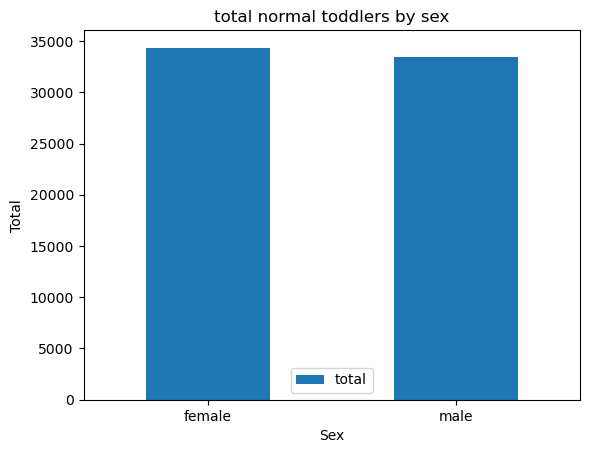

In [17]:
ax = df_normal_gender.plot(kind='bar' , title='total normal toddlers by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Total')
plt.xticks([0,1],['female','male'])
ax.set_xticklabels(['female','male'],rotation=0)
plt.show()

### How many people based on gender are stunted ?

In [18]:
df_stunted_gender = df_status_gender[df_status_gender['status'] == 'stunted']
df_stunted_gender=df_stunted_gender.drop(columns='height(cm)')
df_stunted_gender.rename(columns={'age(month)':'total'},inplace=True)
df_stunted_gender=df_stunted_gender.reset_index()
df_stunted_gender=df_stunted_gender.drop(columns='index')

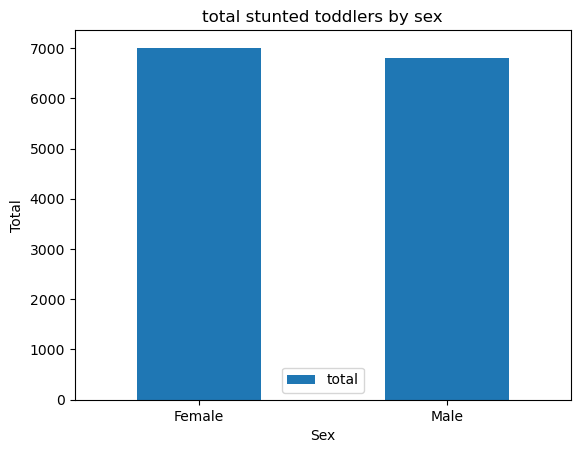

In [19]:
ax = df_stunted_gender.plot(kind='bar',title='total stunted toddlers by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Total')
plt.xticks([0,1],['Female','Male'])
ax.set_xticklabels(['Female','Male'],rotation=0)
plt.show()

### how many people based on calorie status ?

In [20]:
df_status_total = df['status'].groupby(df['status']).count().sort_values(ascending=False)

In [21]:
df_status_total

status
normal              67755
severely stunted    19869
tall                19560
stunted             13815
Name: status, dtype: int64

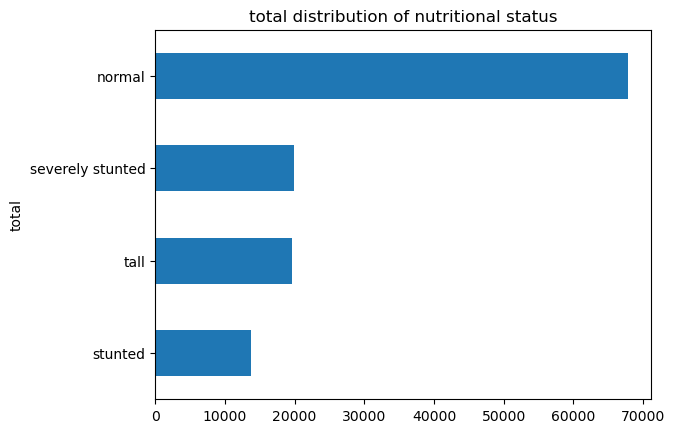

In [22]:
ax = df_status_total.plot(kind='barh',title='total distribution of nutritional status')
ax.set_ylabel('total')
plt.gca().invert_yaxis()
plt.show()

### what is the average height for calorie status ?

In [23]:
df_mean_height = df.groupby('status')['height(cm)'].mean()
df_mean_height=df_mean_height.sort_values(ascending=False)

In [24]:
df_mean_height

status
tall                94.912898
normal              92.702689
stunted             82.208722
severely stunted    73.176224
Name: height(cm), dtype: float64

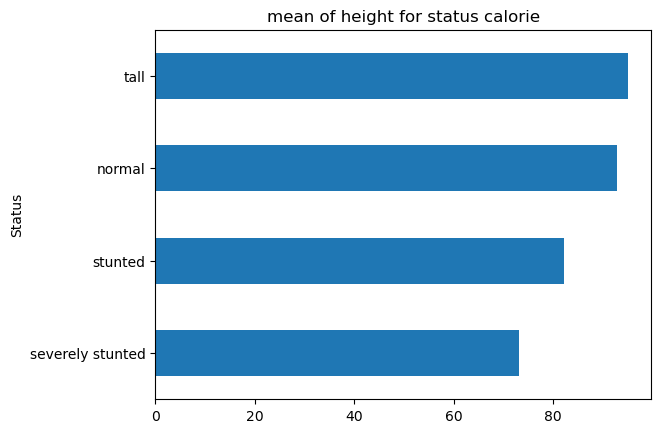

In [25]:
ax = df_mean_height.plot(kind='barh',title='mean of height for status calorie')
ax.set_ylabel('Status')
plt.gca().invert_yaxis()
plt.show()

## Data Preprocessing

* Turn gender into binary/numeric
* One Hot Encode status data column
* Normalize height data column
* Train-Test Split data

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [136]:
#binary transformer for gender
class BinaryEncoder(BaseEstimator,TransformerMixin) : 
    def fit(self,X,y=None) : 
        return self
    def transform(self,X) : 
        binary_gender={'male':0,'female':1}
        X['gender'] = [binary_gender[i] for i in X['gender']]
        
        return X

#encoder for categorical data
class Encoder(BaseEstimator,TransformerMixin) : 
    def fit(self,X,y=None) : 
        return self 
    
    def transform(self,X) : 
        num_status = {'stunted':0,'tall':1,'normal':2,'severely stunted':3}
        X['status']  = [num_status[i] for i in X['status']]
        
        return X
#normalization transfomer 
class Normalize(BaseEstimator,TransformerMixin) : 
    def fit(self,X,y=None) :
        return self 
    def transform(self,X) :         
        sc = StandardScaler()
        normalized = sc.fit_transform(X)
        X = normalized
        
        return X

In [137]:
binary = BinaryEncoder()
enc = Encoder()
norm = Normalize()

#manually transform with transformer class
#norm.fit_transform(enc.fit_transform(binary.fit_transform(df)))


In [138]:
#build pipeline
pipe = Pipeline([
    ('binary',BinaryEncoder()),
    ('enc',Encoder()),
])
pipe

Pipeline(steps=[('binary', BinaryEncoder()), ('enc', Encoder())])

In [139]:
#build pipeline
pipe_X = Pipeline([
    ('norm',StandardScaler())
])
pipe_X

Pipeline(steps=[('norm', StandardScaler())])

In [140]:
df = pipe.fit_transform(df)

In [142]:
#separating data and label 
X = df.iloc[:,0:3] 
y = df.iloc[:,-1]

In [143]:
#X = pipe_X.fit_transform(X)
X

,age(month),gender,height(cm)
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494
...,...,...,...
120994,60,1,100.600000
120995,60,1,98.300000
120996,60,1,121.300000
120997,60,1,112.200000


In [144]:
#train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [145]:
print(X.shape,X_train.shape)
print(y.shape,y_train.shape)
print(X.shape,X_test.shape)
print(y.shape,y_test.shape)

(120999, 3) (96799, 3)
(120999,) (96799,)
(120999, 3) (24200, 3)
(120999,) (24200,)


In [146]:
X_train

,age(month),gender,height(cm)
68922,34,1,101.400000
27242,14,0,84.400000
6818,3,0,59.200000
59965,30,0,97.200000
22573,11,1,60.600000
...,...,...,...
27435,14,0,80.100000
109949,55,0,99.000000
1796,0,1,56.895697
3294,1,1,49.018360


In [147]:
X_test

,age(month),gender,height(cm)
29748,15,0,85.0
115612,58,0,98.7
96655,48,1,98.4
49865,25,0,81.3
118241,59,1,103.3
...,...,...,...
109703,55,0,106.0
18058,9,1,58.1
51440,26,0,81.4
101028,51,0,111.1


## Training Model

In [148]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [149]:
classifier = RandomForestClassifier()

In [150]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

## Model Prediction

In [151]:
y_pred = classifier.predict(X_test)

## Model Evaluation

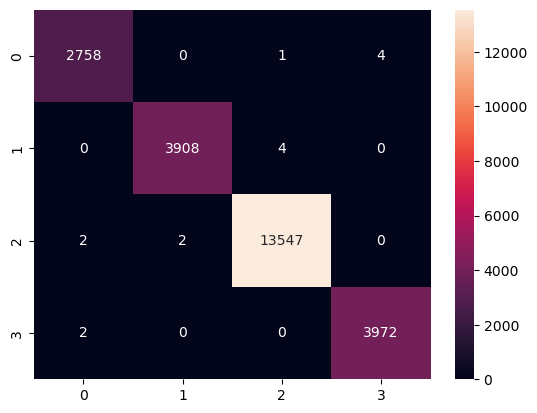

In [152]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [153]:
test_data_accuracy = accuracy_score(y_test,y_pred)

In [154]:
print(f'accuracy score of test data = {test_data_accuracy}')

accuracy score of test data = 0.9993801652892562


In [155]:
from sklearn.metrics import classification_report 

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2763
           1       1.00      1.00      1.00      3912
           2       1.00      1.00      1.00     13551
           3       1.00      1.00      1.00      3974

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



#### Making a Predictive System

In [185]:
input_data = pd.DataFrame({
    'age(month)' : [0],
    'gender' : [0],
    'height(cm)' : [41]
})

#input_transformed = pipe_X.fit_transform(input_data)
predicted_status = classifier.predict(input_data)
if predicted_status[0] == 0 : 
    print('stunted')
elif predicted_status[0] == 1 :
    print('tall')
elif predicted_status[0] == 2 :
    print('normal')
elif predicted_status[0] == 3 :
    print('severely stunted')

severely stunted
